In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [8]:
training=pd.read_csv(r"C:\Users\HP\Desktop\AI\dataset\train.csv")
testing=pd.read_csv(r"C:\Users\HP\Desktop\AI\dataset\test.csv")

In [9]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


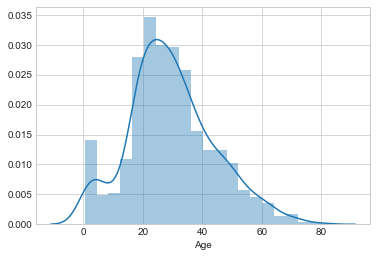

In [15]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

In [16]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


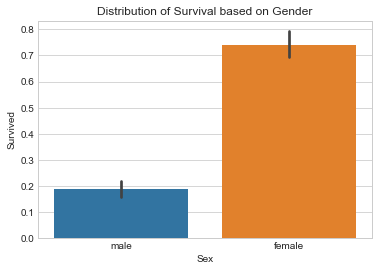

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [17]:
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))


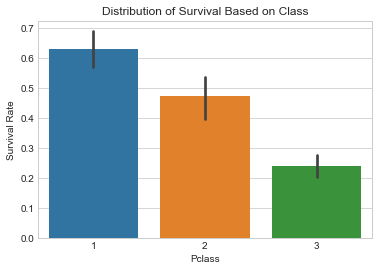

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [18]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5,1,'Survival Rates Based on Gender and Class')

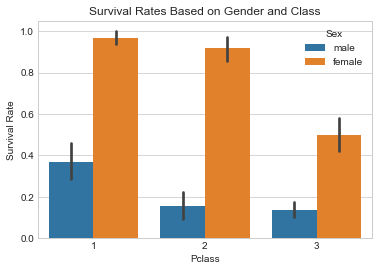

In [19]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")


Text(0.5,1,'Survival Rates Based on Gender and Class')

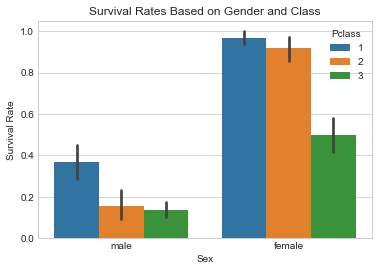

In [20]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

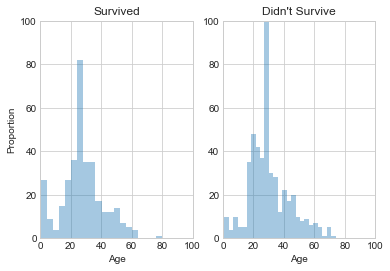

In [21]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

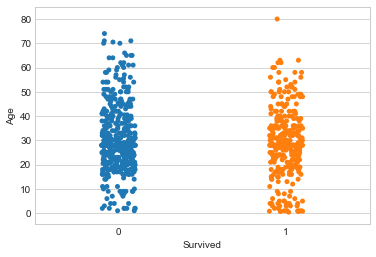

In [22]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

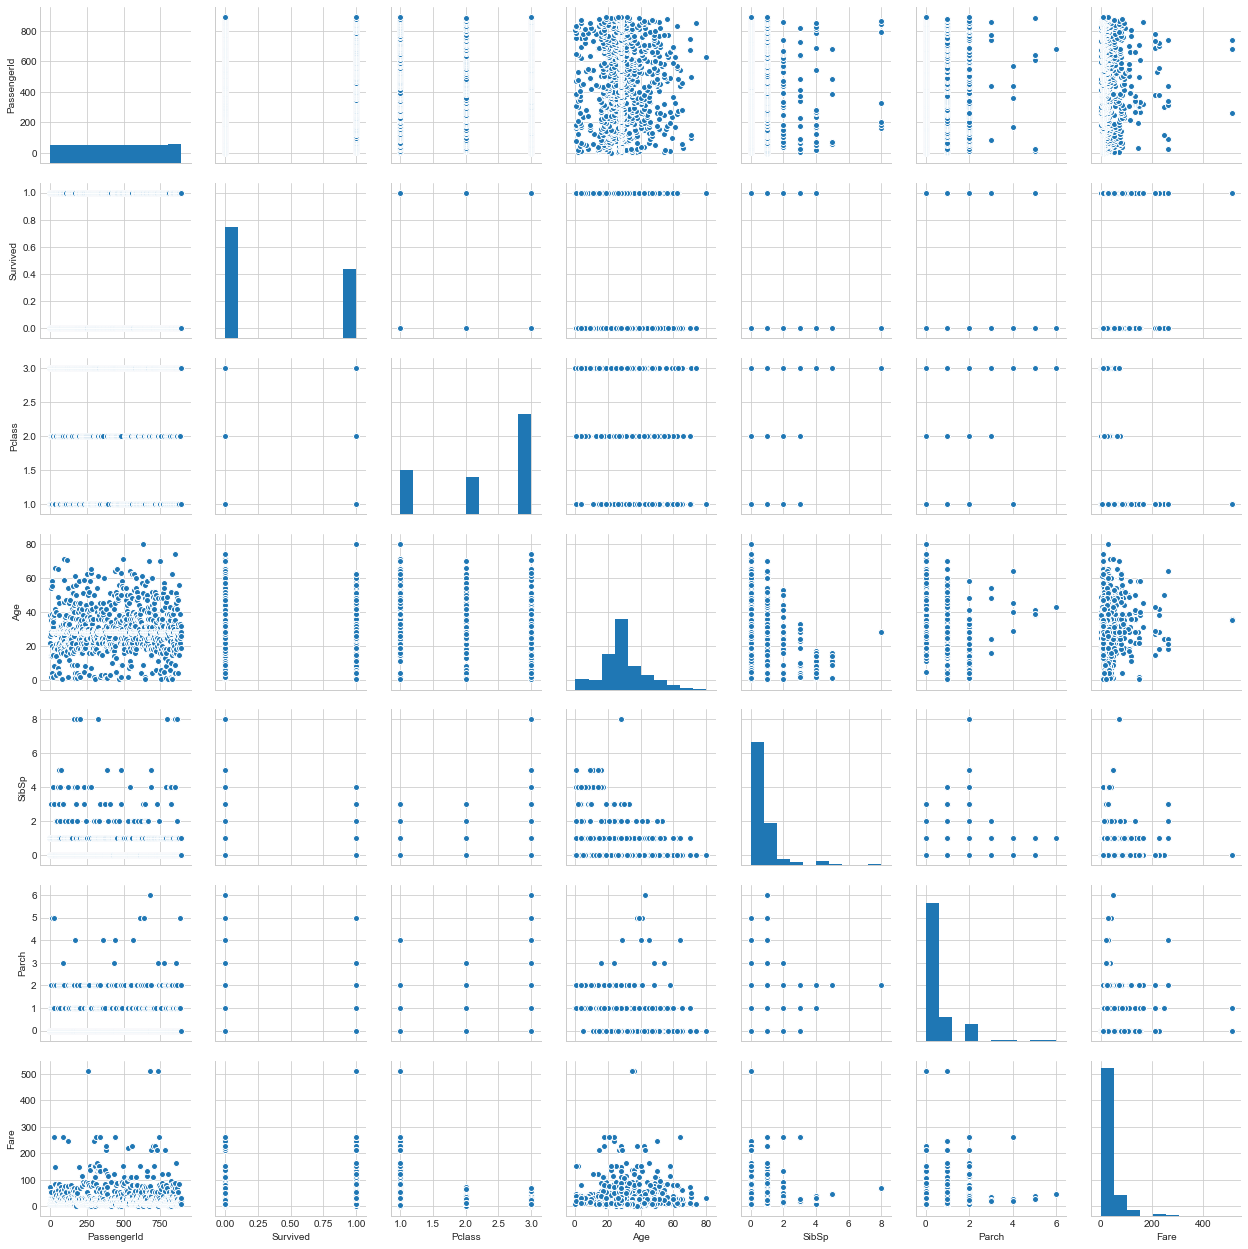

In [23]:
sns.pairplot(training)

In [24]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,7.9250,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,30.0708,C
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,25.9292,S
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,7.0500,S


In [25]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
194,1086,2,"Drew, Master. Marshall Brines",male,8.0,0,2,32.5000,S
204,1096,2,"Andrew, Mr. Frank Thomas",male,25.0,0,0,10.5000,S
370,1262,2,"Giles, Mr. Edgar",male,21.0,1,0,11.5000,S
177,1069,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,55.4417,C
145,1037,3,"Vander Planke, Mr. Julius",male,31.0,3,0,18.0000,S


In [26]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2


In [27]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
91,92,0,3,"Andreasson, Mr. Paul Edvin",0,20.0,0,0,7.8542,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",0,28.0,0,0,0.0000,0
853,854,1,1,"Lines, Miss. Mary Conover",1,16.0,0,1,39.4000,0
575,576,0,3,"Patchett, Mr. George",0,19.0,0,0,14.5000,0
635,636,1,2,"Davis, Miss. Mary",1,28.0,0,0,13.0000,0


In [28]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [29]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)


In [30]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other", "Rev": "Other", "Dr": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Other", "Title"] = 4

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Other", "Title"] = 4

In [31]:
print(set(training["Title"]))

{0, 1, 2, 3, 4}


In [32]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
632,633,1,1,"Stahelin-Maeglin, Dr. Max",0,32.0,0,0,30.5000,1,1,1,4
260,261,0,3,"Smith, Mr. Thomas",0,28.0,0,0,7.7500,2,1,1,1
99,100,0,2,"Kantor, Mr. Sinai",0,34.0,1,0,26.0000,0,2,0,1
205,206,0,3,"Strom, Miss. Telma Matilda",1,2.0,0,1,10.4625,0,2,0,0
623,624,0,3,"Hansen, Mr. Henry Damsgaard",0,21.0,0,0,7.8542,0,1,1,1


In [33]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.metrics import make_scorer, accuracy_score 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
X_train = training[features] #define training features set
y_train = training["Survived"] #define training label set
X_test = testing[features] #define testing features set
#we don't have y_test, that is what we're trying to predict with our model


In [37]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [38]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7262569832402235


In [39]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.7988826815642458


In [40]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8324022346368715


In [41]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.7988826815642458


In [42]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


In [43]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7877094972067039


In [44]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.7932960893854749


In [48]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.832402
1,Linear SVC,0.798883
3,Logistic Regression,0.798883
6,Decision Tree,0.793296
5,Gaussian Naive Bayes,0.787709
4,K Nearest Neighbors,0.743017
0,SVC,0.726257


In [54]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
submission_predictions = rf_clf.predict(X_test)

In [57]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
